In [1]:
# Importing essential libraries
import pandas as pd  # For handling tabular data
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical graphics
from sklearn.cluster import KMeans  # Clustering algorithm
from sklearn.preprocessing import StandardScaler  # Normalizes features

In [3]:
# Loading the dataset
df = pd.read_csv('/content/internet_usage.csv')

# Checking data info and summary
print("Data Info:")
print(df.info())
print("\nSummary Stats:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_usage_hours        100 non-null    float64
 1   site_categories_visited  100 non-null    int64  
 2   sessions_per_day         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None

Summary Stats:
       daily_usage_hours  site_categories_visited  sessions_per_day
count         100.000000               100.000000        100.000000
mean            6.298375                 5.100000         10.870000
std             3.448911                 2.653376          5.799086
min             0.143016                 1.000000          1.000000
25%             3.494349                 3.000000          5.000000
50%             6.169502                 5.000000         11.500000
75%             9.069780                 7.000000         16.000000
m

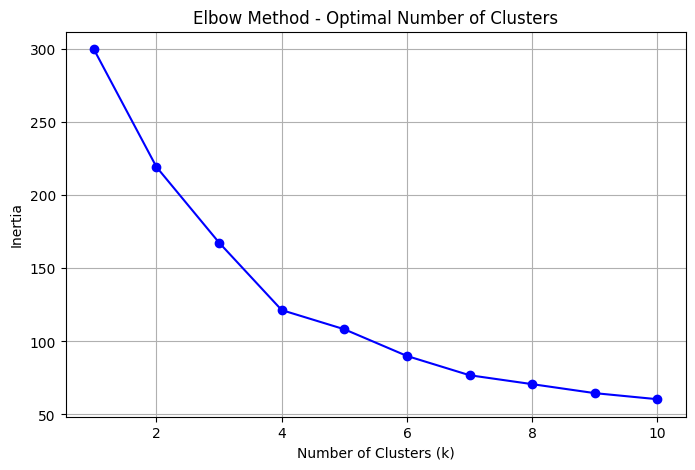

In [6]:
# Feature Scaling (Normalization)
# KMeans performs better when features are scaled (0 mean, unit variance)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# Using Elbow Method to choose optimal number of clusters (k)
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='blue')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


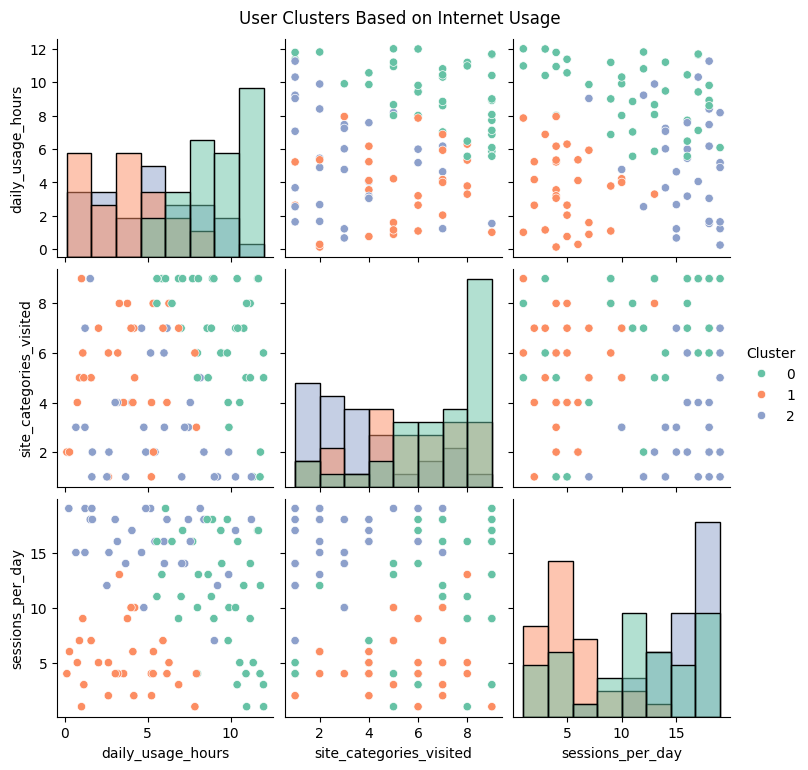

In [7]:
# Fit KMeans with optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Converting cluster to int
df['Cluster'] = df['Cluster'].astype(int)

# Visualizing Clusters with pairplot
sns.pairplot(df, hue='Cluster', palette='Set2', diag_kind='hist')
plt.suptitle("User Clusters Based on Internet Usage", y=1.02)
plt.show()

In [9]:
# Understanding characteristics of each cluster
print("\nCluster-wise Averages:")
print(df.groupby('Cluster').mean())


Cluster-wise Averages:
         daily_usage_hours  site_categories_visited  sessions_per_day
Cluster                                                              
0                 9.307566                 6.631579         11.131579
1                 3.666101                 5.166667          5.200000
2                 5.192716                 3.218750         15.875000
